In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def bid_function_simulator(price_fmt, n_bidders, val_fn, val_fn_params, val_fn_range, step_size, trials = 10000):
    
    
    steps = np.arange(val_fn_range[0], val_fn_range[-1] + step_size, step_size) 
    """
    If second price auction, just return the values
    """
    if price_fmt == 2:
        return steps, steps
    
    """
    For first price auction, compute the shading term and return values - shading term
    """
    cdf =[]
    
    for val in steps:
        events = []
        for trial in range(trials):
            bids_sim = val_fn(*(val_fn_params + [n_bidders-1]))
            events.append(1 if val > max(bids_sim) else 0)
            
        cdf.append(np.mean(events))
    

    integrals = [np.trapz(cdf[:idx+1],steps[:idx+1]) for idx in range(len(steps))]    
    bid_function = steps - np.divide(integrals, cdf)

    return steps, bid_function

In [9]:
val_fn_list = [np.random.uniform , np.random.uniform, np.random.triangular, np.random.exponential]
val_fn_params_list = [[0, 1], [5, 10], [0, 0.5, 1], [1.0/1.0]]
val_fn_range_list = [[0,1], [5, 10], [0, 1], [0, 10]]

num_steps = 100


titles = []

/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide
/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide


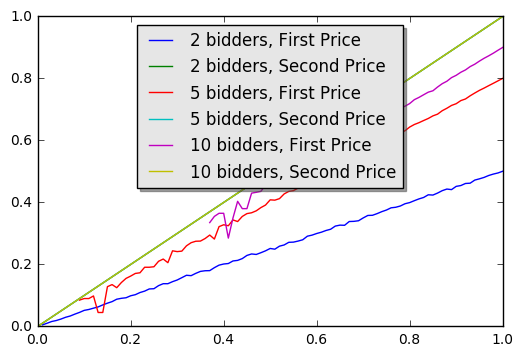

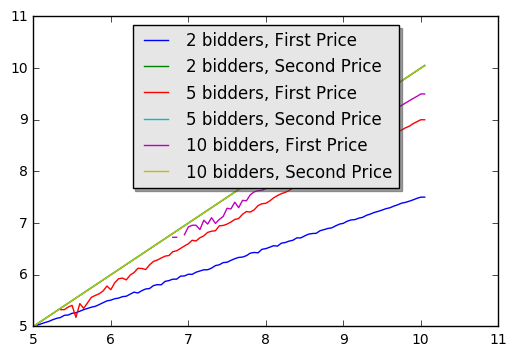

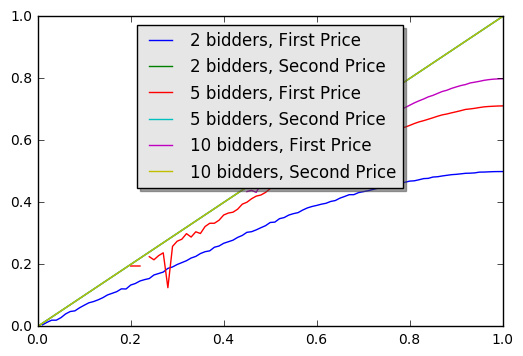

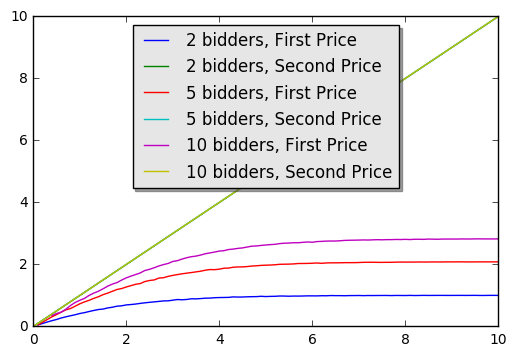

In [10]:
for plot_number in range(4):
    
    val_fn = val_fn_list[plot_number]
    val_fn_params = val_fn_params_list[plot_number]
    val_fn_range = val_fn_range_list[plot_number]
    
    step_size = (val_fn_range_list[plot_number][-1] - val_fn_range_list[plot_number][0])*1.0/num_steps
    
    fig, ax = plt.subplots()
    
    for n in [2, 5, 10]:
        steps_fp, fp_bf = bid_function_simulator(1, n, val_fn, val_fn_params, val_fn_range, step_size, trials = 10000)        
        steps_sp, sp_bf = bid_function_simulator(2, n, val_fn, val_fn_params, val_fn_range, step_size, trials = 10000)
    
        ax.plot(steps_fp, fp_bf, label='%s bidders, First Price' % (n))
        ax.plot(steps_sp, sp_bf, label='%s bidders, Second Price' % (n))
    
    legend = ax.legend(loc='upper center', shadow=True)
    frame = legend.get_frame()
    frame.set_facecolor('0.90')
    
    plt.show()

In [11]:
titles = ['Uniform [0,1]', 'Uniform [5,10]', 'Triangle [0, 1/2, 1]', 'Exponential (Lambda=1)']

In [13]:
## UTILITY FUNCTION FOR FETCHING BID VALUE IN AUCTIONS:

def fetch_bids (n_bidders, values, bid_function_values, val_fn, val_fn_params):
    
    bid_list = []
    
    for bidder in range(n_bidders):
        
        """
        Ensure the value lies in the range specified so we can get back the bidding function value.
        """
     
     
        iter_count = 0
        while True or iter_count < 100:
            iter_count += 1
            bidder_value = val_fn(*(val_fn_params))
            if bidder_value >= values[0] and bidder_value <= values[-1]:
                break
        
        """
        Given our values range, get the closest value to bidder_value and return our bid. 
        For example, if bidder_value is 0.063 but our values range goes like 0.06, 0.07, and so on, we shall
        return the bid at the value of 0.06. 
        """
        idx = (np.abs(values-bidder_value)).argmin()
        
        
        bid_list.append(values[idx] if np.isnan(bid_function_values[idx]) else bid_function_values[idx])
    
    return bid_list

In [18]:
for dist_number in range(4):
    
    val_fn = val_fn_list[dist_number]
    val_fn_params = val_fn_params_list[dist_number]
    val_fn_range = val_fn_range_list[dist_number]
    title = titles[dist_number]
    
    step_size = (val_fn_range_list[dist_number][-1] - val_fn_range_list[dist_number][0])*1.0/num_steps
    
    for n_bidders in [2, 5, 10]:
        steps_fp, fp_bf = bid_function_simulator(1, n_bidders, val_fn, val_fn_params, val_fn_range, step_size, trials = 10000)        
        steps_sp, sp_bf = bid_function_simulator(2, n_bidders, val_fn, val_fn_params, val_fn_range, step_size, trials = 10000)
    
        rev_list_fp = []
        rev_list_sp = []
        n_sims = 1000
        
#         Replace NANs with zeros in First Price Auction
#         steps_fp = np.nan_to_num(steps_fp) 
        
        
        for i in range(n_sims):
            
            bids_sim_fp = fetch_bids(n_bidders, steps_fp, fp_bf, val_fn, val_fn_params)
            rev_list_fp.append(max(bids_sim_fp))
            
            bids_sim_sp = fetch_bids(n_bidders, steps_sp, sp_bf, val_fn, val_fn_params)
            rev_list_sp.append(sorted(bids_sim_sp)[-2])
            
        print "Expected Revenue in First Price Auction with %s bidders in %s Distribution is %s" % (n_bidders, title, np.mean(rev_list_fp))
        print "Standard Deviation in First Price Auction with %s bidders in %s Distribution is %s" % (n_bidders, title, np.std(rev_list_fp))
        
        print 
        
        print "Expected Revenue in Second Price Auction with %s bidders in %s Distribution is %s" % (n_bidders, title, np.mean(rev_list_sp))
        print "Standard Deviation in Second Price Auction with %s bidders in %s Distribution is %s" % (n_bidders, title, np.std(rev_list_sp))
        
        print "------------------------------------------------------------------------------------------------------"
    
    print
    print "**********************************************************************************************************"

/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in divide


Expected Revenue in First Price Auction with 2 bidders in Uniform [0,1] Distribution is 0.331281924621
Standard Deviation in First Price Auction with 2 bidders in Uniform [0,1] Distribution is 0.118074441725

Expected Revenue in Second Price Auction with 2 bidders in Uniform [0,1] Distribution is 0.32678
Standard Deviation in Second Price Auction with 2 bidders in Uniform [0,1] Distribution is 0.231649372112
------------------------------------------------------------------------------------------------------


/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:26: RuntimeWarning: divide by zero encountered in divide


Expected Revenue in First Price Auction with 5 bidders in Uniform [0,1] Distribution is 0.667498262856
Standard Deviation in First Price Auction with 5 bidders in Uniform [0,1] Distribution is 0.112849278321

Expected Revenue in Second Price Auction with 5 bidders in Uniform [0,1] Distribution is 0.66242
Standard Deviation in Second Price Auction with 5 bidders in Uniform [0,1] Distribution is 0.176852321444
------------------------------------------------------------------------------------------------------
Expected Revenue in First Price Auction with 10 bidders in Uniform [0,1] Distribution is 0.82070809213
Standard Deviation in First Price Auction with 10 bidders in Uniform [0,1] Distribution is 0.0704440192187

Expected Revenue in Second Price Auction with 10 bidders in Uniform [0,1] Distribution is 0.81556
Standard Deviation in Second Price Auction with 10 bidders in Uniform [0,1] Distribution is 0.11059785893
----------------------------------------------------------------------